# 📰 Sentiment Analysis of Google News Headlines

This notebook demonstrates how to scrape headlines from **Google News**, perform **sentiment analysis** using the `TextBlob` library, and export the results to a CSV file for further analysis or visualization (e.g., in Power BI).

### 🔧 Tools Used:
- `requests`, `BeautifulSoup`: Web scraping
- `pandas`: Data handling
- `TextBlob`: Sentiment polarity scoring
- `datetime`: Timestamping entries


## Import Libraries

In [41]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from textblob import TextBlob
import datetime

## Define the Scraper Function

In [57]:
def scrape_google_news():
    import requests
    from bs4 import BeautifulSoup
    from textblob import TextBlob
    import pandas as pd

    url = "https://news.google.com/rss?hl=en-US&gl=US&ceid=US:en"
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")

        news_data = []
        items = soup.find_all("item")

        for item in items:
            title = item.title.text if item.title else None
            link = item.find("guid").text if item.find("guid") else None
            pub_date = item.find("pubdate").text if item.find("pubdate") else None

            if not title:
                continue

            sentiment = round(TextBlob(title).sentiment.polarity, 4)

            news_data.append({
                "timestamp": pub_date,
                "headline": title,
                "link": link,
                "sentiment": sentiment
            })

        print(f"📰 Scraped {len(news_data)} headlines")
        return pd.DataFrame(news_data)

    except requests.RequestException as e:
        print(f"🚨 Request failed: {e}")
        return pd.DataFrame()


## Scrape & Display Headlines

In [58]:
df_news = scrape_google_news()
df_news.head(10)

📰 Scraped 38 headlines


,timestamp,headline,link,sentiment
0,"Wed, 26 Mar 2025 19:46:07 GMT",'F-18s LAUNCH': Atlantic publishes purported Y...,CBMiqAFBVV95cUxPdFBWcldkdnJodXFCQWp6YVBJSGZlV1...,0.0000
1,"Wed, 26 Mar 2025 20:59:44 GMT",Alien Enemies Act deportations blocked by appe...,CBMigAFBVV95cUxONDlSbGtZbC1CS0VwbUU4VjQxOWJLUV...,-0.2500
2,"Wed, 26 Mar 2025 19:49:56 GMT",Tufts international graduate student taken int...,CBMipAFBVV95cUxPbUI2Z1V6N0VxNEUxUUkteTZaeHd0dj...,0.0000
3,"Wed, 26 Mar 2025 17:22:00 GMT",Trump administration pulls back billions in Co...,CBMijgFBVV95cUxNbnNtZk1nQmZlZXRvd0pXOEhtLTFoOV...,0.0000
4,"Wed, 26 Mar 2025 22:29:03 GMT",Trump floats tariff reduction if China agrees ...,CBMiuwFBVV95cUxQYzYtSXBGc2ZidGZCQXhUNnBPZTVNUl...,0.0000
5,"Wed, 26 Mar 2025 17:27:00 GMT",NPR and PBS testify in heated hearing of Marjo...,CBMifEFVX3lxTE1iTFFDTFR3RXB3OHA3OEZSOUhyUFhiUH...,0.0000
6,"Wed, 26 Mar 2025 22:41:00 GMT",Democrats take hope from upset win in a GOP-le...,CBMisAFBVV95cUxPemVEV0dRYmdzVHIzUUtpNUVKLU00QV...,0.8000
7,"Wed, 26 Mar 2025 18:11:10 GMT",Luigi Mangione Was Sent Socks With Heart-Shape...,CBMihgFBVV95cUxPcUM5eHc4N1BfdnJyQkw2cmZPdEJwYX...,0.1364
8,"Wed, 26 Mar 2025 09:33:45 GMT",Trump signs new executive order to change elec...,CBMirwFBVV95cUxPV3FKSjdvc3lneWZxdDhJMTUxcFhpR2...,0.0682
9,"Wed, 26 Mar 2025 20:28:24 GMT",Denmark welcomes US decision to skip Greenland...,CBMilgFBVV95cUxNRTV1QnVNb2t3aFhZMEczcWJ2NW10ek...,0.0000


## Save Results to CSV

In [59]:
df_news.to_csv("scraped_google_news.csv", index=False)
print("✅ News data saved to 'scraped_google_news.csv'")

✅ News data saved to 'scraped_google_news.csv'


# Visualization Setup

## 📊 Sentiment Visualization in Python

In this section, we use Python libraries `matplotlib` and `seaborn` to visualize the sentiment scores of news headlines scraped from Google News RSS.

We explore:
- Distribution of sentiment polarity
- Overall sentiment breakdown (positive, neutral, negative)
- Top headlines with strongest sentiments


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Histogram of Sentiment Scores

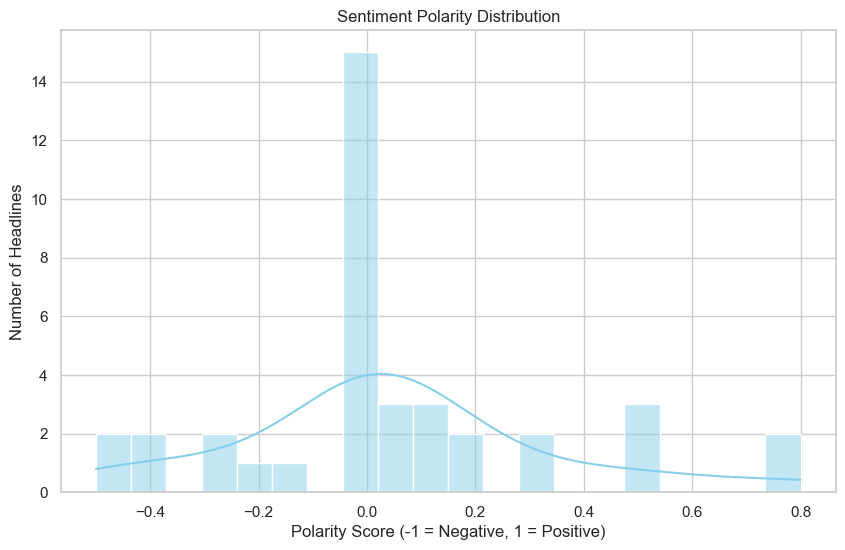

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(df_news['sentiment'], bins=20, kde=True, color='skyblue')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity Score (-1 = Negative, 1 = Positive)")
plt.ylabel("Number of Headlines")
plt.show()

### 📈 Sentiment Polarity Distribution

This histogram shows how sentiment scores (ranging from -1 to +1) are distributed across the scraped headlines. A score of:
- `> 0` indicates positive sentiment
- `< 0` indicates negative sentiment
- `= 0` or near 0 represents neutrality

The KDE curve helps us understand the underlying distribution pattern.

## Sentiment Categories

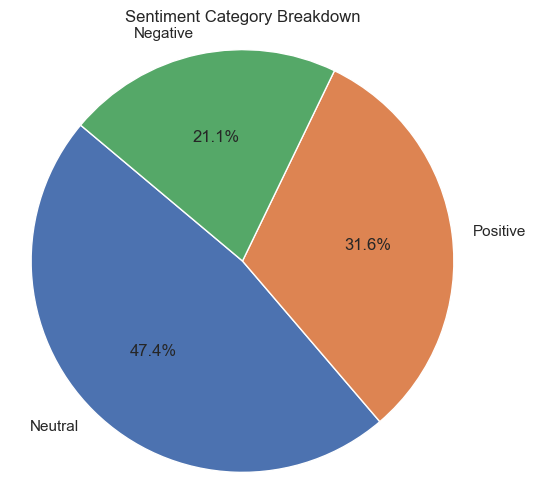

In [63]:
def categorize_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df_news["category"] = df_news["sentiment"].apply(categorize_sentiment)
sentiment_counts = df_news["category"].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Category Breakdown")
plt.axis('equal')
plt.show()

### 🥧 Sentiment Breakdown

To simplify interpretation, sentiment scores were categorized as:
- Positive (`> 0.1`)
- Negative (`< -0.1`)
- Neutral (`between -0.1 and 0.1`)

This pie chart shows the percentage of headlines falling into each category.


In [64]:
print("🟢 Top 10 Most Positive Headlines:\n")
print(df_news.sort_values("sentiment", ascending=False)[["headline", "sentiment"]].head(10))

print("\n🔴 Top 10 Most Negative Headlines:\n")
print(df_news.sort_values("sentiment")[["headline", "sentiment"]].head(10))

🟢 Top 10 Most Positive Headlines:

                                             headline  sentiment
31  Neptune’s auroras are captured in great detail...     0.8000
6   Democrats take hope from upset win in a GOP-le...     0.8000
17  Dollar Tree says it's winning over higher-inco...     0.5000
22  Every ‘X-Men’ Actor in the ‘Avengers: Doomsday...     0.5000
29  Houston coach Kelvin Sampson is winning after ...     0.5000
30  Supermoon This Week Will Coincide With Rare 'D...     0.3000
27  2025 NCAA Tournament bracket: Sweet 16 predict...     0.2833
36  Measles case confirmed in DC, individual may h...     0.2000
34  Measles quickly spreading in Kansas counties w...     0.1667
15  Stock futures fall as investors weigh Trump's ...     0.1364

🔴 Top 10 Most Negative Headlines:

                                             headline  sentiment
23  ‘The Studio’ Bosses Evan Goldberg And Seth Rog...    -0.5000
21  Some Google Pixel owners reporting failed alar...    -0.5000
37  Is pollen seaso